***
< [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/syp-implementation/blob/main/README.md) >

## CompTIA Security+ - Course Material 2022
###### Topic: ``Database Security``
***

Course material for the ``CompTIA Security+`` module of the ``ICT Associate Apprenticeship (Cybersecurity)`` programme.

<a id="top"></a>
***
## Table of Contents
***

### [Database Security](#a) <br/><br/>

- [Tokenization](#b) <br/><br/>
- [Hashing a Password](#c) <br/><br/>
    - [``SHA-256``](#d) <br/><br/>
        - [``Salt``](#e) 
<hr width=50%;>

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="a"></a>
***
### Database Security
***

When we are storing data we’re often putting it into some type of database and obviously, we need to protect the data that is stored in that database, and we need to protect the data that is transmitted to and from that database.

We know that the data that we’re storing is incredibly valuable - in some cases, entire businesses are built around data that is stored inside of a database. 

Also have to manage the data inside of that database so that it complies with rules and regulations such as PCI DSS, HIPAA, GDPR, and other compliance rules.

Having strong security of our database ensures that the data is always available, and therefore ensures that the business is always able to operate - if there is a breach to the database, it not only disrupts the business, but can also be extremely expensive to repair.

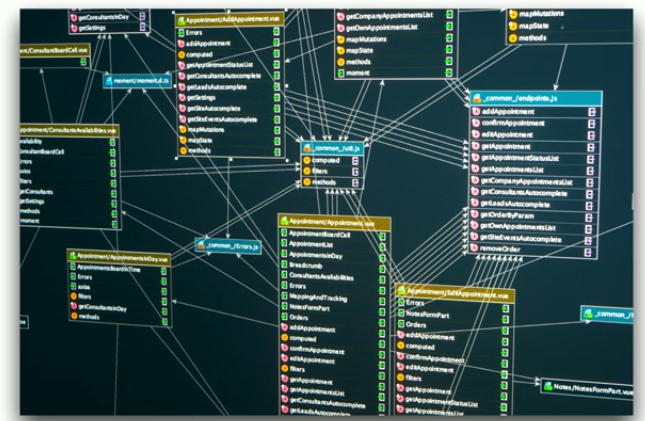

< [Table of Contents](#top) | [References](#references) >
<a id="b"></a>
***
###### Tokenization
***

One way to protect data inside of a database is to not actually store the real data inside of the database - instead, we use a ``Technique`` called ``Tokenization``, where we might have sensitive data that we replace with a token that is not associated with the original value.

A social security number such as 266-12-1112 is stored in the database as 691-61-8539 - a completely different number, and has no representation to the original social security number that was originally stored in the database.

Also see tokenization used when we’re storing credit card numbers - need to have credit card information stored so that we can use it during our normal purchase process, but we also want to protect ourselves from anyone else gaining access to that credit card number, so instead of storing the actual credit card number on our device, we’ll store a temporary credit card number, or temporary token, on our device and use that during the purchase process. 

That token is sent to a server that validates the token during the purchase process, and that token is then thrown away, and a different token will be used for the next purchase. That means that if an attacker does find a way to gain access to that token during the purchase process, they won’t be able to use that for any subsequent purchases - that’s a valuable part of this tokenization process, is that you’re able to limit the use of these tokens.

An interesting part of this tokenization process is that we’re not hashing any of our sensitive data, and we’re not encrypting any of our sensitive data, so there’s no overhead associated with any cryptographic function - simply replacing one value with a tokenized value and using that token for our transactions.

< [Table of Contents](#top) | [References](#references) >
<a id="c"></a>
***
###### Hashing a Password
***

Another way to store information in a database is to store it as a hash - this is something that’s commonly done with passwords because we can store the password as a message digest, which is a fixed length string of text but storing that hash, instead of storing a password, means that an attacker would not be able to understand what the original password was if they did gain access to the data.

A unique aspect of hashes is that different inputs will have a different hash value and that we will not see a duplicated hash value, which we refer to as a collision - we also know that there’s no way to retrieve the password from a hashed value. 

The hash is a fingerprint of the original information, and not some type of encrypted representation - we also know that the hash a one-way trip - there’s no way to reverse the process and somehow see what the password was based on a hash that’s stored inside of a database.

< [Table of Contents](#top) | [References](#references) >
<a id="d"></a>
***
###### Hashing a Password - ``SHA-256``
***

Examples of some hashes that are based on some passwords - this is a SHA-256 hash. 

It’s a 256-bit hash value and what we do is take the original password, for example, 123456 - not a great password, but still, we’re able to hash that password and the hash that we would store in our database is this very long 256-bit value.

Can see that that value has no representation to the 123456 password, and there’s no way to reverse the process to somehow return back to that original password value.

During the login process, the login that you put in is going to also be hashed and compared to this hashed value that’s stored in the database. 

In [1]:
import hashlib
msg1=hashlib.sha256()
msg1.update(b"123456")
f"Password: 123456 - Hash: {msg1.hexdigest()}"

'Password: 123456 - Hash: 8d969eef6ecad3c29a3a629280e686cf0c3f5d5a86aff3ca12020c923adc6c92'

Can see the hashes for ``1234567`` are very different than the hash for ``123456``, and the hash for ``qwerty``, and the hash for ``password``, are also very different values.

In [2]:
msg2=hashlib.sha256()
msg2.update(b"1234567")
f"Password: 1234567 - Hash: {msg2.hexdigest()}"

'Password: 1234567 - Hash: 8bb0cf6eb9b17d0f7d22b456f121257dc1254e1f01665370476383ea776df414'

In [3]:
msg3=hashlib.sha256()
msg3.update(b"querty")
f"Password: querty - Hash: {msg3.hexdigest()}"

'Password: querty - Hash: 35029a33a4321a1577432430a8520a406d1de641bea7dd96ade6311a90050a81'

In [4]:
msg4=hashlib.sha256()
msg4.update(b"password")
f"Password: password - Hash: {msg4.hexdigest()}"

'Password: password - Hash: 5e884898da28047151d0e56f8dc6292773603d0d6aabbdd62a11ef721d1542d8'

If an attacker somehow came across our database that was filled with these hashes, they would have no idea what the original passwords were and they would have no way to easily reverse the process back into those original passwords.

< [Table of Contents](#top) | [References](#references) >
<a id="e"></a>
***
###### Hashing a Password - ``Salt``
***

To add even more randomization to these hashes that we’re creating, we would add some additional information during the hashing proces - that additional information is called a salt - if you have multiple users storing passwords, every user is going to have a different salt associated with their account.

Would use that different randomized salt, with the password that they’ve chosen, to then store a hash value in our database - this means that an attacker won’t be able to use rainbow tables to somehow quickly determine what the original password might have been.

A rainbow table is a pre-computed set of hashes and original values but if you use salt during the hashing process to create more randomization, those predefined rainbow tables won’t be very useful - they would have to then perform the normal brute force to try to determine what that original password might be and that is a much slower process than doing something with a rainbow table, that might take only a matter of seconds, to determine what that original password might have been.

Here’s how a salt might change the hashing value that we store in a database - let’s say that our users are going to use exactly the same password on their accounts and the password is ``dragon`` - can see that the hash value for ``dragon`` is listed in our database.

In [5]:
msg5=hashlib.sha256()
msg5.update(b"dragon")
f"{msg5.hexdigest()}"

'a9c43be948c5cabd56ef2bacffb77cdaa5eec49dd5eb0cc4129cf3eda5f0e74c'

For our first user, they’re going to store that password ``dragon``, but there’s going to be some random salt added to that password - can see that the stored hash value is very different than the hash value that’s created by simply using the password ``dragon``.

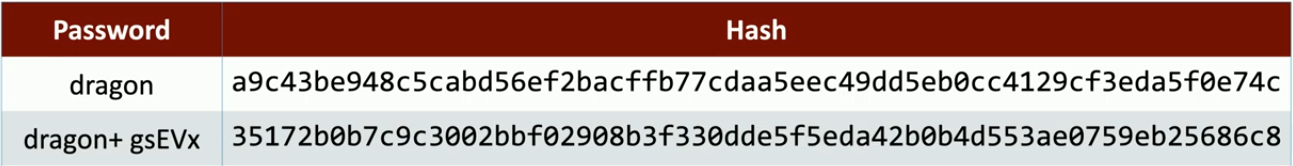

Every user that uses the password ``dragon`` is going to have a different salt, and therefore has a different hash that is stored in the database - if an attacker does gain access to this database, they’ll think these are very different passwords - in reality, they’re exactly the same password with some random salt added but this is now going to create a much longer process for them to be able to brute force the original password used by every user.

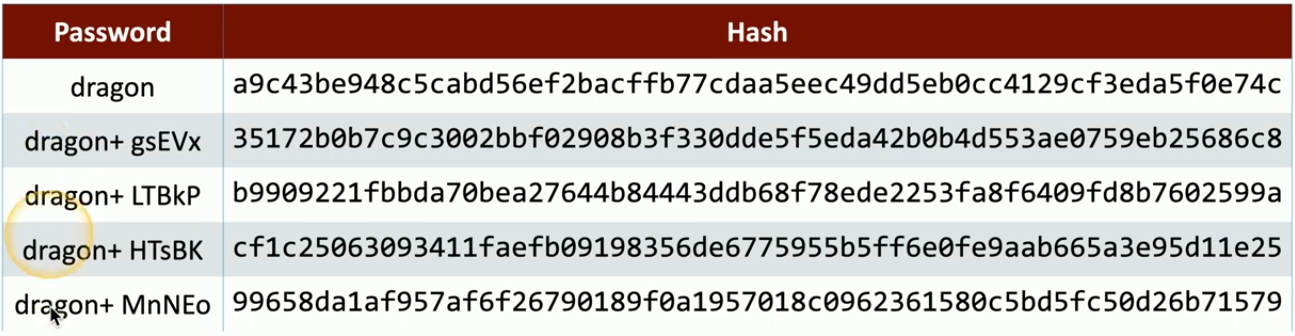

***
## END

< [Table of Contents](#top) >
<a id="references"></a>
***
## References
***

J. "Professor" Messer, "CompTIA Security+ (SY0-601) Course Notes," [professormesser.com](https://web.archive.org/web/20220521181010/https://www.professormesser.com/security-plus/sy0-601/sy0-601-video/sy0-601-comptia-security-plus-course/), September 2021.

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

***
## END

In [6]:
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\SeanOhAileasa\AppData\Local\Temp\ipykernel_10900\1322614208.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display,HTML


# END JUPYTER NOTEBOOK